In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp
from numpy import diff
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

C:\Users\DANIEL\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

In [3]:
# Definiendo sistema de ecuaciones
def funciones(xi,y, alpha, n, h, Upsilon, varkappa):
    psi_ , eta_, psi1_, eta1_ = y
    dydxi = [-h*(eta_+ xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1 + 1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
            ,xi**(2) * psi_**(n)
            ,-(h/xi/(xi - 2*Upsilon*(n+1)*eta_)/(1 + alpha*n/Upsilon/(n+1)/psi_))*((eta1_ + 3*xi**(2)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)) + xi**(3)*(n+1)*Upsilon*psi_**(n)*psi1_*(1 + alpha*n/Upsilon/(n+1)/psi_))*(1 + Upsilon*(psi_ - varkappa**(1 + 1/n)/psi_**(n)) + alpha*(1 - varkappa/psi_**(n))) + (eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1+ 1/n)) + alpha*(psi_**(n) - varkappa)))*((n+1)*Upsilon*psi1_*(1 + alpha*n/Upsilon/(n+1)/psi_) - n*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa))*psi1_/psi_**(n+1)) + (eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - varkappa**(1 + 1/n)/psi_**(n)) + alpha*(1 - varkappa/psi_**(n)))*((2*Upsilon*(n+1)*eta1_ - 1)/(xi - 2*Upsilon*(n+1)*eta_) + alpha*n*psi1_/(1 + alpha*n/Upsilon/(n+1)/psi_)/Upsilon/(n+1)/psi_**(2) - 1/xi))
            ,2*xi*psi_**(n) + n*xi**(2)*psi_**(n-1)*psi1_] 
    return dydxi

In [4]:
c = 2.997*10**(8)          # Velocidad de la luz en S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en S.I.
Msun = 1.989*10**(30)      # Masa solar en S.I.

In [5]:
Lista_C = [0.0,0.0625,0.125,0.1875,0.25]

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

rho_c = 1.5*10**(18)

alpha = -0.01 # Constante del término lineal

varkappa = 0.2 # Razón entre densidad en el borde y densidad central

sigma_m = 0.2  # Sigma para este modelo, con el fin de determinar k

# Sigma = Presión central entre Densidad central
sigma_inicial = 0.1                  
sigma_final = 0.9
PasoSigma = 0.025
NumSigma = round((PasoSigma + sigma_final - sigma_inicial)/PasoSigma)
Lista_sigma = np.linspace(sigma_inicial,sigma_final,NumSigma)

In [6]:
Lista_M = []
Lista_R = []
Lista_Rho_c = []
Lista_sigma_m = []

for i in range(len(Lista_n)):
    
    Lista_M.append([])
    Lista_R.append([])
    Lista_Rho_c.append([])
    Lista_sigma_m.append([])
    
    for j in range(len(Lista_C)):
        
        Lista_M[i].append([])
        Lista_R[i].append([])
        Lista_Rho_c[i].append([])
        Lista_sigma_m[i].append([])        

In [7]:
%%time

for i in range(len(Lista_n)):
    
    n = Lista_n[i]
    
    upsilon = (sigma_m - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))
    
    K = upsilon*c**(2)/rho_c**(1/n)
    
    for j in range(len(Lista_C)):
        
        C = Lista_C[j]
        
        h = 1 - 2*C

        for k in range(len(Lista_sigma)):
            
            sigma = Lista_sigma[k]
            
            Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))
            
            rho_cen = (c**(2)*Upsilon/K)**(n)/1000
                            
            Lista_Rho_c[i][j].append(rho_cen)
            Lista_sigma_m [i][j].append(sigma)
                            
            # Condiciones iniciales
            Psi0 = 1.0
            Eta0 = 0.0
            Psi10 = 0.0
            Eta10 = 0.0
            
            y0 = [Psi0,Eta0,Psi10,Eta10]
            
            def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
                return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
            
            stop_condition.terminal = True
            
            xi0 = 10**(-15)
            ximax = 10000
    
            xi_span = (xi0,ximax)
            
    
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                           args=(alpha, n, h, Upsilon, varkappa))
            
            Psi = soluciones.y[0]
            Eta = soluciones.y[1]
            Psi1 = soluciones.y[2]
            Eta1 = soluciones.y[3]
            xi = soluciones.t
        
            #########################################################################################################################
            
            # Xi normalizada
            xiNorm = xi/xi[-1]
            
            # Presión entre presión central
            PNorm = (1/sigma)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))
            
            m = (c**(2)*Upsilon*(n+1)/(4*np.pi*rho_c)**(1/3)/G)**(3/2)*Eta/Msun   # Masa en unidades de masa solar
            r = (c**(2)*Upsilon*(n+1)/4/np.pi/G/rho_c)**(1/2)*xi/1000             # Radio en kilómetros            
            
            R = (c**(2)*(n+1)/4/np.pi/G)**(1/2)*(K/c**(2))**(n/2)*Upsilon**((1-n)/2)*xi[-1]/1000         # Radio en kilómetros
            M = (c**(2)*(n+1)/(4*np.pi)**(1/3)/G)**(3/2)*(K/c**(2))**(n/2)*Upsilon**((3-n)/2)*Eta[-1]/Msun  # Masa en unidades de masa solar
                        
            Lista_M[i][j].append(M)
            Lista_R[i][j].append(R)

print('K =',K)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


K = 616268239779.0032
Wall time: 8.43 s


In [8]:
LineStyles = ['solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1)),
              'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10))]

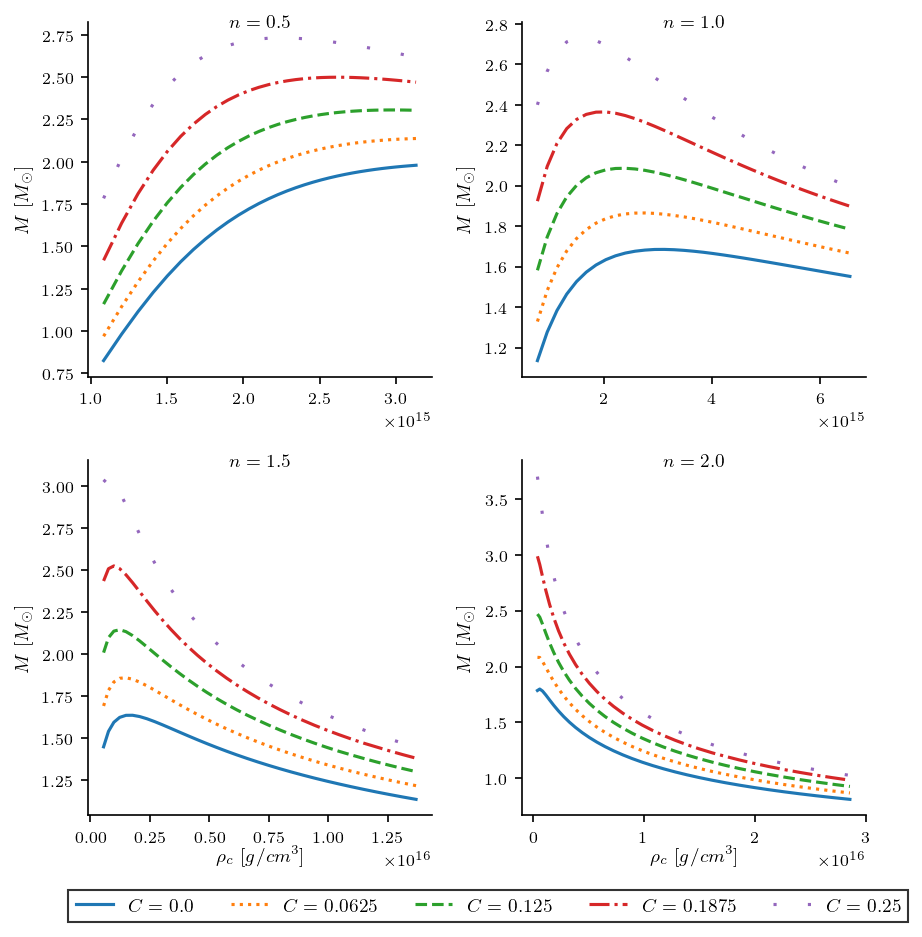

In [9]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    axes[0][0].plot(Lista_Rho_c[0][j],Lista_M[0][j],linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c[1][j],Lista_M[1][j],linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c[2][j],Lista_M[2][j],linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c[3][j],Lista_M[3][j],linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
    
# axes[0][0].set_xlabel(r'$\rho_c \, \, [kg/m^{3}]$',fontsize=9)
axes[0][0].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
# axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)))

# axes[0][1].set_xlabel(r'$\rho_c \, \, [kg/m^{3}]$',fontsize=9)
axes[0][1].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
# axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)))

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
# axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)))

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$M \, \, [M_{\odot}]$',fontsize=9)
# axes[1][1].set_ybound(-2.0*10**(-19),0.5*10**(-19))
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
# axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)))
axes[1][1].legend(ncol=5, loc=(-1.32,-0.3),fontsize=9,edgecolor='k',fancybox=False)

# axes[1][0].set_xbound(1.1*10**(18),7.4*10**(19))


    

fig.tight_layout()


plt.show()


C:\Users\DANIEL\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


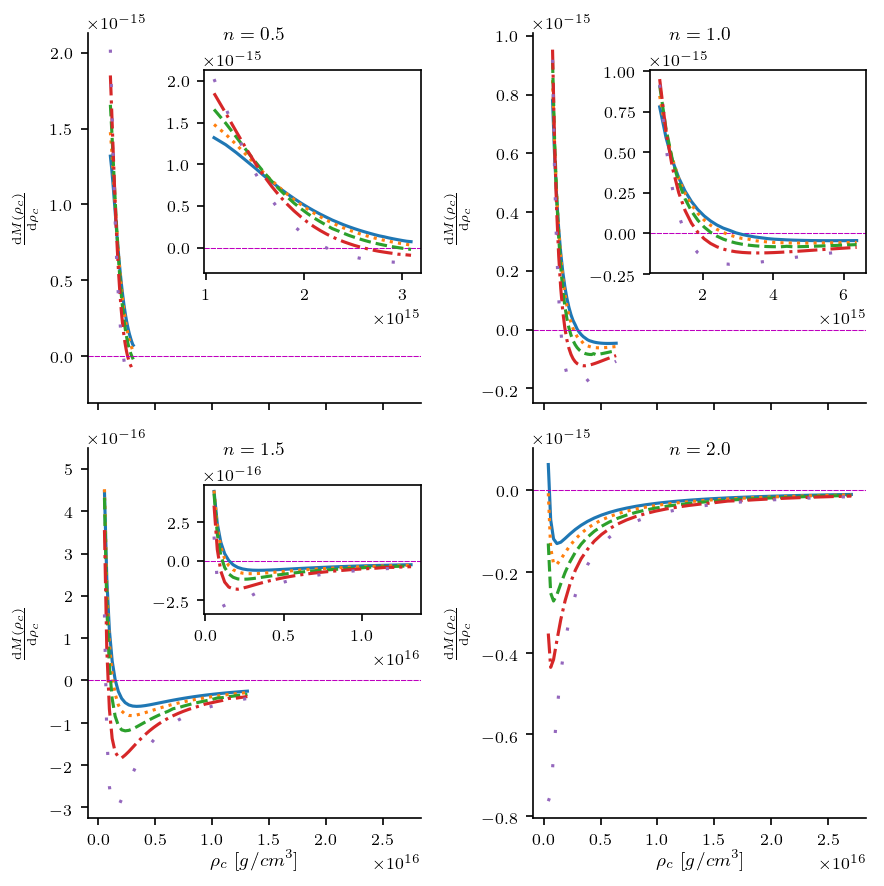

In [16]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(6,6),dpi=150)

ax0 = plt.axes([1.4*10**(18),4.2*10**(18),-1.2*10**(-19),1.35*10**(-18)])
ip = InsetPosition(axes[0][0], [0.35,0.35,0.65,0.55])
ax0.set_axes_locator(ip)
ax0.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

ax1 = plt.axes([1.3*10**(18),1.1*10**(19),-8.8*10**(-20),4.6*10**(-18)])
ip = InsetPosition(axes[0][1], [0.35,0.35,0.65,0.55])
ax1.set_axes_locator(ip)
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

ax2 = plt.axes([1.2*10**(18),2.82*10**(19),-1.0*10**(-19),7.1*10**(-20)])
ip = InsetPosition(axes[1][0], [0.35,0.55,0.65,0.35])
ax2.set_axes_locator(ip)
ax2.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)


for j in range(len(Lista_C)):
    
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_Rho_c[0][j])
    Lista_Rho_c0 = Lista_Rho_c[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_Rho_c[1][j])
    Lista_Rho_c1 = Lista_Rho_c[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_Rho_c[2][j])
    Lista_Rho_c2 = Lista_Rho_c[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_Rho_c[3][j])
    Lista_Rho_c3 = Lista_Rho_c[3][j][:-1]
    
    
    axes[0][0].plot(Lista_Rho_c0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    
    ax0.plot(Lista_Rho_c0,dmdrho0,linestyle=LineStyles[j])
    ax1.plot(Lista_Rho_c1,dmdrho1,linestyle=LineStyles[j])
    ax2.plot(Lista_Rho_c2,dmdrho2,linestyle=LineStyles[j])

# ax0.xaxis.get_offset_text().soffset_text_position = "right"
    
# axes[0][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

# axes[0][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_ybound(-3.25*10**(-16),5.5*10**(-16))
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
# axes[1][1].set_ybound(-2.0*10**(-19),0.5*10**(-19))
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
# axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)



    

fig.tight_layout()


plt.show()


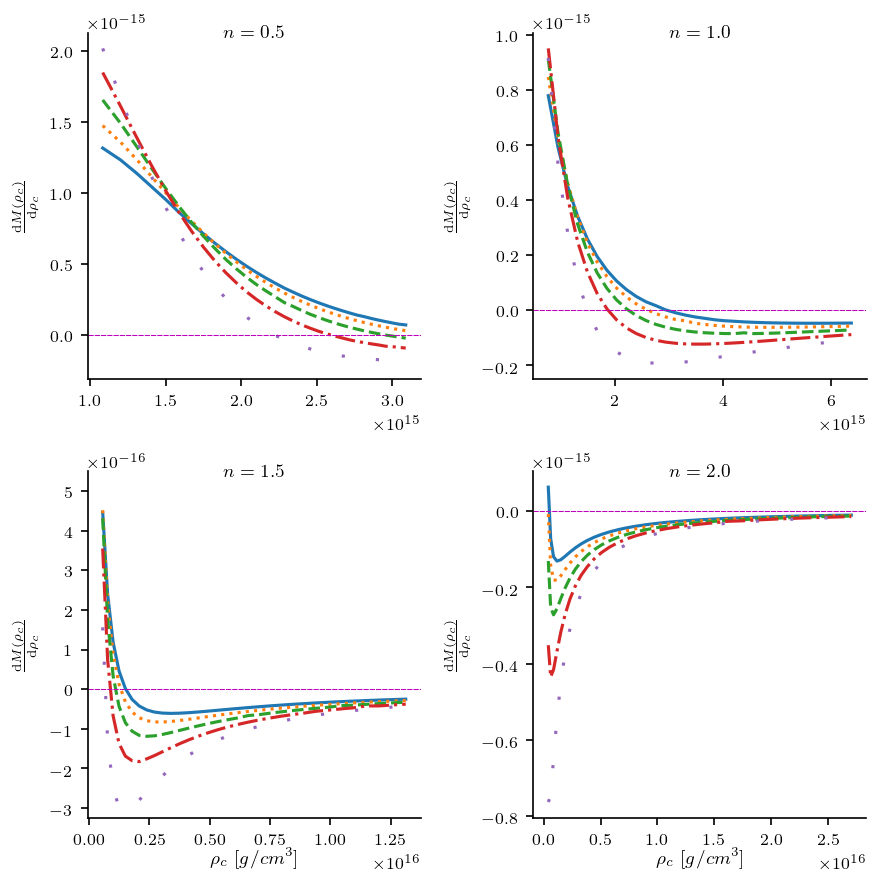

In [17]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_Rho_c[0][j])
    Lista_Rho_c0 = Lista_Rho_c[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_Rho_c[1][j])
    Lista_Rho_c1 = Lista_Rho_c[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_Rho_c[2][j])
    Lista_Rho_c2 = Lista_Rho_c[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_Rho_c[3][j])
    Lista_Rho_c3 = Lista_Rho_c[3][j][:-1]
    
    
    axes[0][0].plot(Lista_Rho_c0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))

# ax0.xaxis.get_offset_text().soffset_text_position = "right"
    
# axes[0][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

# axes[0][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_ybound(-3.25*10**(-16),5.5*10**(-16))
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
# axes[1][1].set_ybound(-2.0*10**(-19),0.5*10**(-19))
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
# axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)

fig.tight_layout()


plt.show()


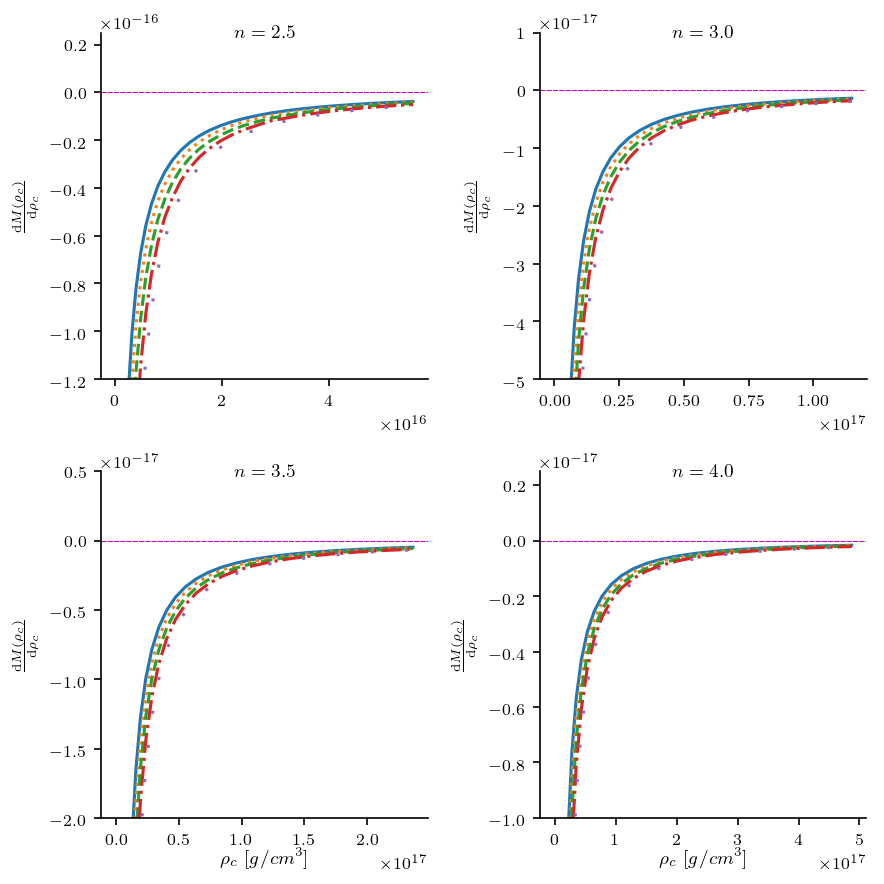

In [18]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,figsize=(6,6),dpi=150)


for j in range(len(Lista_C)):
    
    dmdrho4 = diff(Lista_M[4][j])/diff(Lista_Rho_c[4][j])
    Lista_Rho_c4 = Lista_Rho_c[4][j][:-1]
    
    dmdrho5 = diff(Lista_M[5][j])/diff(Lista_Rho_c[5][j])
    Lista_Rho_c5 = Lista_Rho_c[5][j][:-1]
    
    dmdrho6 = diff(Lista_M[6][j])/diff(Lista_Rho_c[6][j])
    Lista_Rho_c6 = Lista_Rho_c[6][j][:-1]
    
    dmdrho7 = diff(Lista_M[7][j])/diff(Lista_Rho_c[7][j])
    Lista_Rho_c7 = Lista_Rho_c[7][j][:-1]
    
    
    axes[0][0].plot(Lista_Rho_c4,dmdrho4,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_Rho_c5,dmdrho5,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_Rho_c6,dmdrho6,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_Rho_c7,dmdrho7,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    


    
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_ybound(-1.2*10**(-16),2.5*10**(-17))
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[4]),x=0.5,y=0.95,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_ybound(-0.5*10**(-16),1*10**(-17))
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[5]),x=0.5,y=0.95,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_ybound(-0.2*10**(-16),0.5*10**(-17))
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[6]),x=0.5,y=0.95,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xlabel(r'$\rho_c \, \, [g/cm^{3}]$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_ybound(-0.01*10**(-15),0.25*10**(-17))
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[7]),x=0.5,y=0.95,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
# axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)



    

fig.tight_layout()


plt.show()


In [13]:
Lista_dmdrho = []

for i in range(len(Lista_n)):
    
    Lista_dmdrho.append([])
    
    for j in range(len(Lista_C)):
                
        dmdrho = diff(Lista_M[i][j])/diff(Lista_sigma_m[i][j])
        
        Lista_dmdrho[i].append(dmdrho)
        
        
for i in range(len(Lista_n)):
        
    for j in range(len(Lista_C)):
        
        lim = np.where(np.diff(np.sign(Lista_dmdrho[i][j])) != 0)
        
        if len(lim[0]) == 0:
            
            if np.sign(Lista_dmdrho[i][j][len(Lista_dmdrho[i][j])//2]) == 1:
                
                print('n = {}, '.format(Lista_n[i]), 'C = {} ,'.format(Lista_C[j]), 'Todos los sigmas son válidos')
            
            else:
                
                print('n = {}, '.format(Lista_n[i]), 'C = {} ,'.format(Lista_C[j]), 'Ninguno de los sigmas es válido')
        
        elif len(lim[0]) == 1:
            
            print('n = {}, '.format(Lista_n[i]), 'C = {} ,'.format(Lista_C[j]), 'sigma límite = {}'.format(Lista_sigma_m[i][j][lim[0][0]]))

        else:
            print('n = {}, '.format(Lista_n[i]), 'C = {} ,'.format(Lista_C[j]), 'sigma límite 1 = {}, '.format(Lista_sigma_m[i][j][lim[0][0]]),
                  'sigma límite 2 = {}'.format(Lista_sigma_m[i][j][lim[0][1]]))
            

n = 0.5,  C = 0.0 , Todos los sigmas son válidos
n = 0.5,  C = 0.0625 , Todos los sigmas son válidos
n = 0.5,  C = 0.125 , sigma límite = 0.775
n = 0.5,  C = 0.1875 , sigma límite = 0.6
n = 0.5,  C = 0.25 , sigma límite = 0.42500000000000004
n = 1.0,  C = 0.0 , sigma límite = 0.4
n = 1.0,  C = 0.0625 , sigma límite = 0.35
n = 1.0,  C = 0.125 , sigma límite = 0.30000000000000004
n = 1.0,  C = 0.1875 , sigma límite = 0.25
n = 1.0,  C = 0.25 , sigma límite = 0.17500000000000002
n = 1.5,  C = 0.0 , sigma límite = 0.2
n = 1.5,  C = 0.0625 , sigma límite = 0.17500000000000002
n = 1.5,  C = 0.125 , sigma límite = 0.15000000000000002
n = 1.5,  C = 0.1875 , sigma límite = 0.125
n = 1.5,  C = 0.25 , sigma límite = 0.1
n = 2.0,  C = 0.0 , sigma límite = 0.1
n = 2.0,  C = 0.0625 , Ninguno de los sigmas es válido
n = 2.0,  C = 0.125 , Ninguno de los sigmas es válido
n = 2.0,  C = 0.1875 , Ninguno de los sigmas es válido
n = 2.0,  C = 0.25 , Ninguno de los sigmas es válido
n = 2.5,  C = 0.0 , Ningun

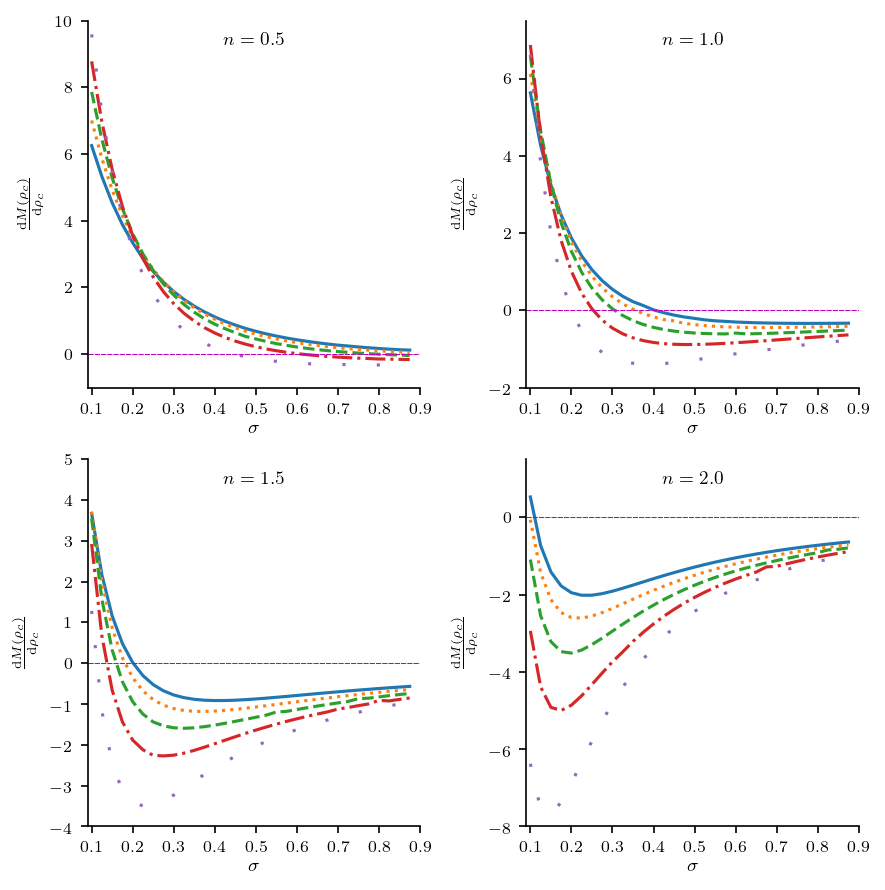

In [19]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    dmdrho0 = diff(Lista_M[0][j])/diff(Lista_sigma_m[0][j])
    Lista_sigma_m0 = Lista_sigma_m[0][j][:-1]
    
    dmdrho1 = diff(Lista_M[1][j])/diff(Lista_sigma_m[1][j])
    Lista_sigma_m1 = Lista_sigma_m[1][j][:-1]
    
    dmdrho2 = diff(Lista_M[2][j])/diff(Lista_sigma_m[2][j])
    Lista_sigma_m2 = Lista_sigma_m[2][j][:-1]
    
    dmdrho3 = diff(Lista_M[3][j])/diff(Lista_sigma_m[3][j])
    Lista_sigma_m3 = Lista_sigma_m[3][j][:-1]
    
    
    axes[0][0].plot(Lista_sigma_m0,dmdrho0,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_sigma_m1,dmdrho1,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_sigma_m2,dmdrho2,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_sigma_m3,dmdrho3,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    

axes[0][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].set_xbound(0.09,0.9)
axes[0][0].set_ybound(-1.0,10.0)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[0]),x=0.5,y=0.9,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].set_xbound(0.09,0.9)
axes[0][1].set_ybound(-2.0,7.5)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[1]),x=0.5,y=0.9,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].set_xbound(0.09,0.9)
axes[1][0].set_ybound(-4.0,5.0)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[2]),x=0.5,y=0.9,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].set_ybound(-8.0,1.5)
axes[1][1].set_xbound(0.09,0.9)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[3]),x=0.5,y=0.9,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
# axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)


fig.tight_layout()


plt.show()

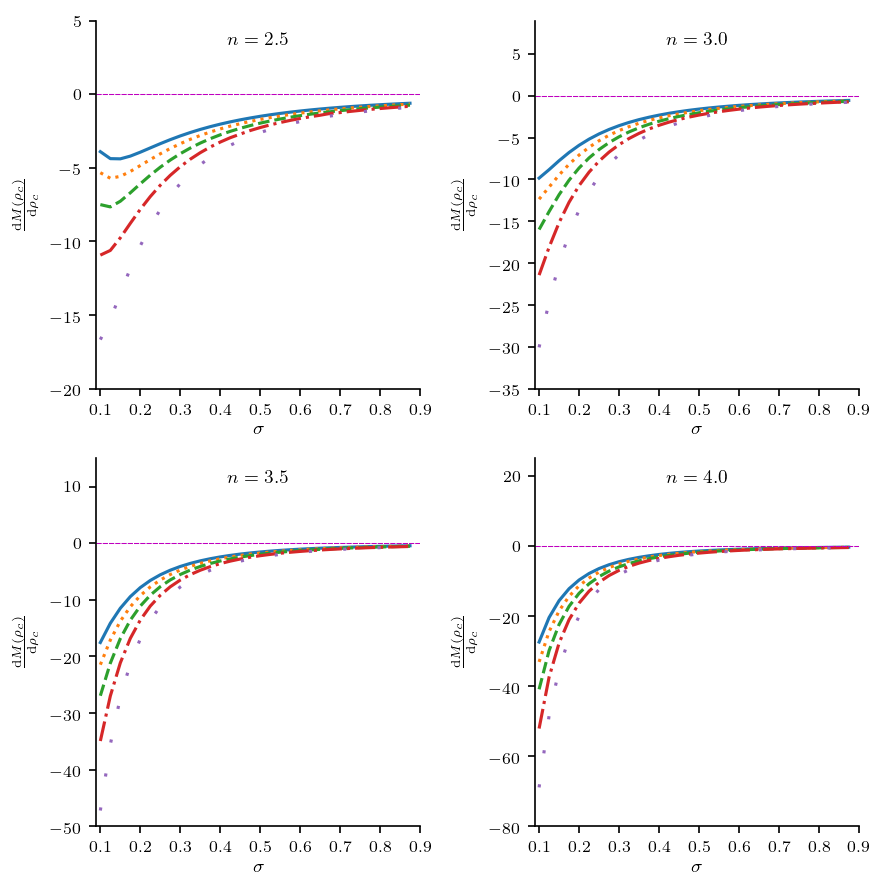

In [20]:
axes = ()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6),dpi=150)

for j in range(len(Lista_C)):
    
    dmdrho4 = diff(Lista_M[4][j])/diff(Lista_sigma_m[4][j])
    Lista_sigma_m4 = Lista_sigma_m[4][j][:-1]
    
    dmdrho5 = diff(Lista_M[5][j])/diff(Lista_sigma_m[5][j])
    Lista_sigma_m5 = Lista_sigma_m[5][j][:-1]
    
    dmdrho6 = diff(Lista_M[6][j])/diff(Lista_sigma_m[6][j])
    Lista_sigma_m6 = Lista_sigma_m[6][j][:-1]
    
    dmdrho7 = diff(Lista_M[7][j])/diff(Lista_sigma_m[7][j])
    Lista_sigma_m7 = Lista_sigma_m[7][j][:-1]
    

    axes[0][0].plot(Lista_sigma_m4,dmdrho4,linestyle=LineStyles[j])
    axes[0][1].plot(Lista_sigma_m5,dmdrho5,linestyle=LineStyles[j])
    axes[1][0].plot(Lista_sigma_m6,dmdrho6,linestyle=LineStyles[j])
    axes[1][1].plot(Lista_sigma_m7,dmdrho7,linestyle=LineStyles[j],label=r'$C = {}$'.format(Lista_C[j]))
    

axes[0][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][0].set_xbound(0.09,0.9)
axes[0][0].set_ybound(-20.0,5.0)
axes[0][0].xaxis.set_label_coords(0.5,-0.0875)
axes[0][0].set_title(r'$n = %.1f$'%(Lista_n[4]),x=0.5,y=0.9,fontsize=9)
axes[0][0].spines['right'].set_color('none')
axes[0][0].spines['top'].set_color('none')
axes[0][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[0][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[0][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[0][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[0][1].set_xbound(0.09,0.9)
axes[0][1].set_ybound(-35.0,9)
axes[0][1].xaxis.set_label_coords(0.5,-0.0875)
axes[0][1].set_title(r'$n = %.1f$'%(Lista_n[5]),x=0.5,y=0.9,fontsize=9)
axes[0][1].spines['right'].set_color('none')
axes[0][1].spines['top'].set_color('none')
axes[0][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][0].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][0].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][0].set_xbound(0.09,0.9)
axes[1][0].set_ybound(-50.0,15.0)
axes[1][0].xaxis.set_label_coords(0.5,-0.0875)
axes[1][0].set_title(r'$n = %.1f$'%(Lista_n[6]),x=0.5,y=0.9,fontsize=9)
axes[1][0].spines['right'].set_color('none')
axes[1][0].spines['top'].set_color('none')
axes[1][0].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

axes[1][1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axes[1][1].set_xlabel(r'$\sigma$',fontsize=9)
axes[1][1].set_ylabel(r'$\frac{\mathrm{d}M(\rho_c)}{\mathrm{d}\rho_c}$',fontsize=9)
axes[1][1].set_xbound(0.09,0.9)
axes[1][1].set_ybound(-80.0,25.0)
axes[1][1].xaxis.set_label_coords(0.5,-0.0875)
axes[1][1].set_title(r'$n = %.1f$'%(Lista_n[7]),x=0.5,y=0.9,fontsize=9)
axes[1][1].spines['right'].set_color('none')
axes[1][1].spines['top'].set_color('none')
axes[1][1].axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
# axes[1][1].legend(ncol=5, loc=(-1.5,-0.3),fontsize=9,edgecolor='k',fancybox=False)


fig.tight_layout()


plt.show()